In [5]:
# _importing required libraries
import os
import collections

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
input_file_path = os.getcwd() + f'/../data/processed_data.csv'
col_names = ['timestamp (s)', 'activityID', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2']
main_df = pd.read_csv(input_file_path, header=None, names=col_names)
pd.Series(main_df['timestamp (s)']).is_unique
main_df

,timestamp (s),activityID,X1,Y1,Z1,X2,Y2,Z2
0,37.66,1,2.21530,8.27915,5.58753,-0.004750,0.037579,-0.011145
1,37.67,1,2.29196,7.67288,5.74467,-0.171710,0.025479,-0.009538
2,37.68,1,2.29090,7.14240,5.82342,-0.238241,0.011214,0.000831
3,37.69,1,2.21800,7.14365,5.89930,-0.192912,0.019053,0.013374
4,37.70,1,2.30106,7.25857,6.09259,-0.069961,-0.018328,0.004582
...,...,...,...,...,...,...,...,...
288214,974.50,3,-1.99794,3.94300,9.15686,-0.112651,-0.003501,-0.066523
288215,974.51,3,-2.00276,4.20689,8.96346,-0.179092,0.020300,-0.010637
288216,974.52,3,-1.96042,4.09413,9.11842,-0.285215,0.010714,-0.017346
288217,974.53,3,-1.97860,3.78659,8.65734,-0.347098,0.040476,-0.020536


In [3]:
window_length = 10
window_overlap = 5
sub_sequences = [[], [], [], [], [], []]
sequence_names = ['X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2']

In [4]:
window_index = 0
max_window_index = len(main_df.index)

while window_index <= (max_window_index - window_length):
    for idx in range(len(sub_sequences)):
        sub_sequences[idx].append(main_df[sequence_names[idx]][window_index:window_index+window_length])
    
    window_index += window_overlap
np_sequences = np.asarray(sub_sequences)

In [10]:
print(np_sequences.shape)
centroids_array = []
kmeans = KMeans(n_clusters = 3)
kmeans.fit(np_sequences[0])

# for seq in range(len(sequence_names)):

#     kmeans.fit(np_sequences[seq])

#     centroids = kmeans.cluster_centers_
#     centroids_array.append(centroids)  
    
#np_centroids = np.array(centroids_array)

(6, 57642, 10)
[0 0 0 ... 0 0 0]


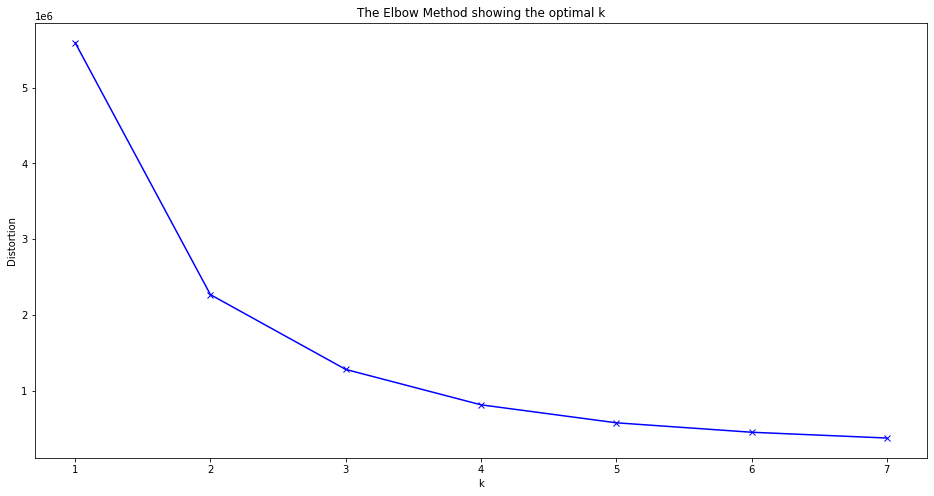

In [8]:
distortions = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(np_sequences[1])
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [11]:
print(collections.Counter(kmeans.labels_))

Counter({0: 22021, 2: 18227, 1: 17394})


In [12]:
print(kmeans.cluster_centers_)

[[-0.85284742 -0.85208739 -0.8500552  -0.85717359 -0.85469406 -0.85139218
  -0.85144263 -0.85277786 -0.85420103 -0.85349144]
 [ 6.31549731  6.31838395  6.31969076  6.32089879  6.32197073  6.32110317
   6.32094845  6.31929277  6.31751381  6.31564513]
 [-8.47618124 -8.47938302 -8.47960917 -8.48051685 -8.48261301 -8.48352219
  -8.48285329 -8.47617588 -8.48111787 -8.47826344]]
